# Aditya Sunilkumar

## **What relation does the distance from home attribute have with the distance from last transaction attribute when a transaction being made using chip AND pin number. How does that affect the likelihood of the transaction being considered as fraudulent?**

As a witness to my friend's experience with credit card fraud, I have become increasingly interested in the subject. In particular, I find the distance from home data points in our dataset to be of great significance in determining the likelihood of a credit card transaction being classified as fraudulent. To achieve an accurate prediction, it is crucial to conduct a thorough analysis of the trends and patterns within the dataset. By carefully examining the data and creating various graphs and charts for analysis, we can identify key indicators that will help us determine the likelihood of a fraudulent transaction. By analyzing the distance from home data points, we can gain insight into whether or not a transaction was made using chip or pin number. This information can be used to establish a baseline for what is considered normal behavior for a cardholder in a particular location. Any transactions that deviate significantly from this baseline can then be flagged for further investigation, as they may be indicative of fraudulent activity. Overall, by utilizing advanced data analysis techniques, we can more accurately predict and prevent credit card fraud, ultimately protecting both individuals and businesses from financial losses.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
df = pd.read_csv("../data/raw/card_transdata.csv")
df.head()

**Let us first describe the dataset we're working on.**

In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,861948.000000,861948.000000,861948.000000,861948.000000,861948.000000,861948.000000,861948.000000,861948.000000,0.0,0.0,0.0,0.0,0.0
mean,26.685782,5.024305,1.823366,0.881712,0.350407,0.100721,0.650555,0.087459,NaN,NaN,NaN,NaN,NaN
std,66.062269,25.595735,2.793597,0.322949,0.477098,0.300959,0.476795,0.282506,NaN,NaN,NaN,NaN,NaN
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3.880929,0.296202,0.475330,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,9.973634,0.997152,0.998388,1.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,25.771207,3.349357,2.097103,1.000000,1.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
max,10632.723670,11851.104560,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891908 entries, 0 to 891907
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              861948 non-null  float64
 1   distance_from_last_transaction  861948 non-null  float64
 2   ratio_to_median_purchase_price  861948 non-null  float64
 3   repeat_retailer                 861948 non-null  float64
 4   used_chip                       861948 non-null  float64
 5   used_pin_number                 861948 non-null  float64
 6   online_order                    861948 non-null  float64
 7   fraud                           861948 non-null  float64
 8   Unnamed: 8                      0 non-null       float64
 9   Unnamed: 9                      0 non-null       float64
 10  Unnamed: 10                     0 non-null       float64
 11  Unnamed: 11                     0 non-null       float64
 12  Unnamed: 12     

**Using the info() function on the dataframe we can see that there are 861948 non-null values for each column present in this dataset. We can also see that row 8-13 have all null values which means that we can remove these rows without having any affect on the entire dataset.**

In [ ]:
df.dropna(inplace=True)

**Now, let's look at how the two variables of interest are distributed ("distance_from_home" and "distance_from_last_transaction"), using histograms:**

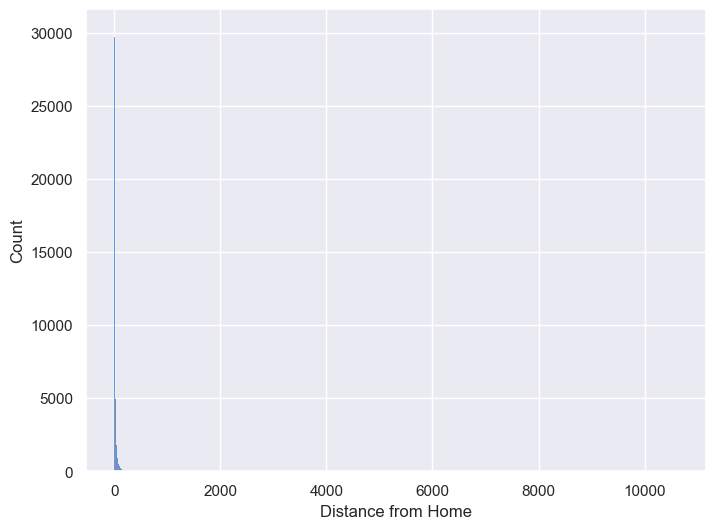

In [18]:
sns.set(rc={'figure.figsize':(8,6)})
sns.histplot(df['distance_from_home'])
plt.xlabel('Distance from Home')
plt.show()


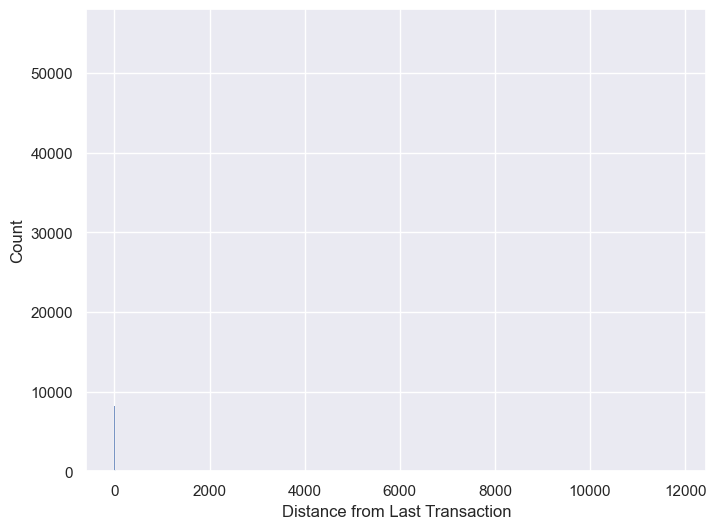

In [19]:
sns.histplot(df['distance_from_last_transaction'])
plt.xlabel('Distance from Last Transaction')
plt.show()

**Next, let's create a scatter plot to visualize the relationship between these two variables for transactions that used chip and pin numbers:**

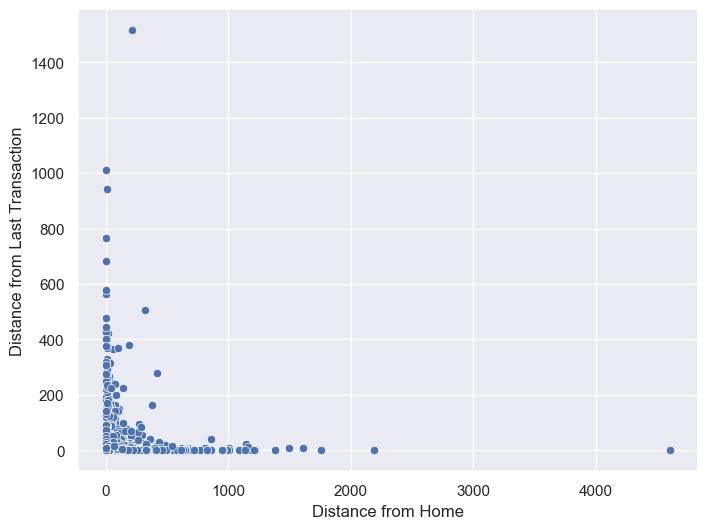

In [13]:
chip_pin_df = df[(df['used_pin_number'] == 1) & (df['used_chip'] == 1)]

sns.scatterplot(x='distance_from_home', y='distance_from_last_transaction', data=chip_pin_df)
plt.xlabel('Distance from Home')
plt.ylabel('Distance from Last Transaction')
plt.show()

**We can observe that there is no clear relationship between these two variables, but there are some transactions with very high values for both distances.
Now, let's explore how these distances are related to the likelihood of a transaction being fraudulent. We can start by creating a box plot of "distance_from_home" for each class of fraudulent and non-fraudulent transactions:**

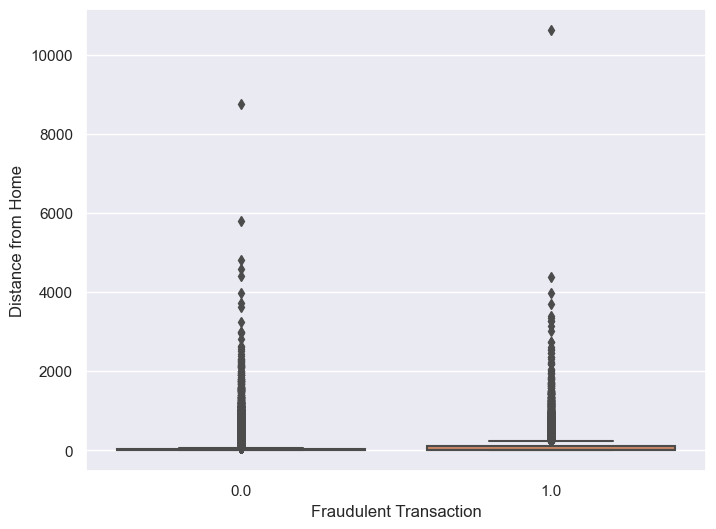

In [15]:
sns.boxplot(x='fraud', y='distance_from_home', data=df)
plt.xlabel('Fraudulent Transaction')
plt.ylabel('Distance from Home')
plt.show()


**We can see that fraudulent transactions tend to have larger distances from home than non-fraudulent ones.**

**Similarly, we can create a box plot of "distance_from_last_transaction" for each class of transactions:**

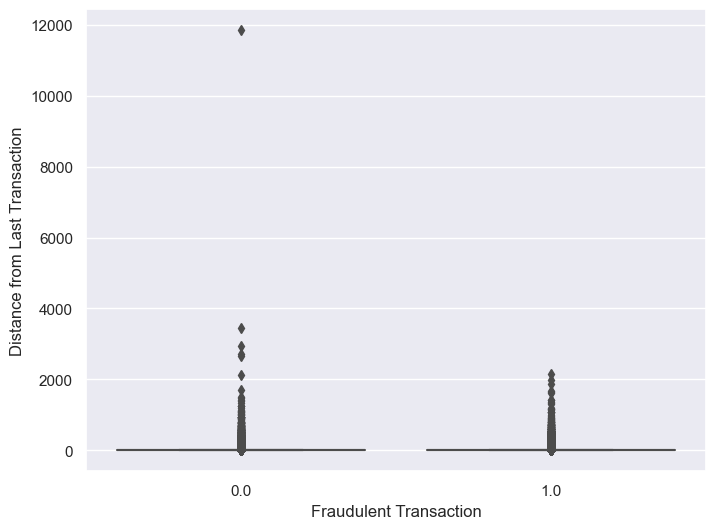

In [17]:
sns.boxplot(x='fraud', y='distance_from_last_transaction', data=df)
plt.xlabel('Fraudulent Transaction')
plt.ylabel('Distance from Last Transaction')
plt.show()


**We can see that fraudulent transactions tend to have smaller distances from the last transaction compared to non-fraudulent ones.**

**Finally, we can create a pair plot to visualize the relationships between the distances and the other numerical variables in the dataset:**

In [ ]:
sns.pairplot(df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'fraud']], hue='fraud', diag_kind='hist')
plt.show()


**This plot allows us to see the relationships between the distances and the other variables, as well as how these relationships differ between fraudulent and non-fraudulent transactions.**

**Since the research question involves exploring the relationship between the distance from home attribute and the distance from the last transaction attribute when a transaction is made using a chip and pin number, we can create a heatmap to visualize the correlation between these variables.**

In [ ]:
df = mydata.drop(['repeat_retailer', 'ratio_to_median_purchase_price', 'online_order'], axis=1)
# Calculate correlation matrix
corr_matrix = df.corr()
# Create correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Distance from Home and Distance from Last Transaction for Chip & Pin Transactions')
plt.show()


# **CONCLUSION**

**In conclusion, this exploratory data analysis provides some initial insights into the relationships between the distances from home and last transaction and the likelihood of a transaction being fraudulent. However, more in-depth analysis and sub-questions may be needed to fully understand the data and draw meaningful conclusions.**